In [1]:
%matplotlib inline
%env KERAS_BACKEND=tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("ok")

env: KERAS_BACKEND=tensorflow
ok


In [2]:
from keras.datasets import mnist

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
from keras.models import Sequential

# 矩陣拉平
from keras.layers import Dense, Flatten

# 抽樣的時候不按照順序
from keras.optimizers import SGD

In [29]:
model = Sequential()

In [30]:
model.add(Flatten(input_shape=(28, 28)))

In [31]:
model.add(Dense(10, activation="relu"))


In [32]:
model.add(Dense(8, activation="relu"))

In [33]:
model.add(Dense(5, activation="relu"))

In [34]:
# 結果輸出層
model.add(Dense(10, activation="softmax"))

In [35]:
model.compile(loss='mse', optimizer=SGD(lr=0.77), metrics=['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                60        
Total params: 8,043
Trainable params: 8,043
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 4710 para
# 784 連到 6 個神經元 加六個 bias
784*6 + 6

4710

In [38]:

# batch_size 幾筆資料就調參數對答案
# 全部資料要學幾次

model.fit(x_train, y_train, batch_size=70, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.0748 - acc: 0.3658
Epoch 2/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.0417 - acc: 0.7183
Epoch 3/25
60000/60000 [==============================] - 2s 42us/step - loss: 0.0241 - acc: 0.8445
Epoch 4/25
60000/60000 [==============================] - 3s 43us/step - loss: 0.0190 - acc: 0.8767
Epoch 5/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.0170 - acc: 0.8898
Epoch 6/25
60000/60000 [==============================] - 3s 43us/step - loss: 0.0159 - acc: 0.8962
Epoch 7/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.0151 - acc: 0.9015
Epoch 8/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.0146 - acc: 0.9053
Epoch 9/25
60000/60000 [==============================] - 2s 42us/step - loss: 0.0141 - acc: 0.9092
Epoch 10/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.0138 - acc: 0.9107

In [44]:
from ipywidgets import interact_manual

In [45]:
predict = model.predict(x_test)

In [46]:
predict[1234]


array([0.09878769, 0.11118805, 0.09930426, 0.10185025, 0.09763751,
       0.09172875, 0.09871791, 0.10384988, 0.09775224, 0.09918345],
      dtype=float32)

In [48]:
predict = model.predict_classes(x_test)

In [49]:
predict[1234]

1

In [50]:
y_test[1234]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [53]:
def test(no):
    plt.imshow(x_test[no], cmap="Blues")
    print("We predict", predict[no])

We predict 1


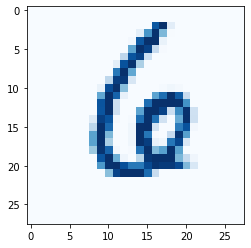

In [54]:
test(123)

In [55]:
interact_manual(test, no=(0, 9999))

interactive(children=(IntSlider(value=4999, description='no', max=9999), Button(description='Run Interact', st…

<function __main__.test(no)>

In [56]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/step


In [57]:
score[1]

0.1135

In [58]:
model_json = model.to_json()
open('stupid_model.json', 'w').write(model_json)
model.save_weights('stupid_model_weights.h5')